In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [136]:
df = pd.read_csv('medical_examination.csv')
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
31004,44275,22386,1,158,95.0,120,70,1,1,0,0,1,0
7872,11250,18006,1,160,65.0,120,80,1,1,0,0,1,0
24284,34698,21868,1,168,75.0,100,70,1,1,0,0,1,0
38077,54350,14596,1,175,57.0,140,80,1,1,0,0,0,1
5115,7269,21065,2,176,95.0,140,90,2,1,0,0,1,1


In [138]:
# Create an 'Overweight' column
bmi = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = bmi.apply(lambda x: 0 if x < 26 else 1)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
46158,65935,22673,2,171,68.0,120,80,1,0,0,0,1,0,0
43418,62036,20514,1,155,56.0,120,70,0,0,0,0,1,0,0
52025,74197,22581,1,166,90.0,120,80,0,0,0,0,1,0,1
24841,35477,23348,1,160,70.0,130,70,1,0,0,0,1,1,1
10620,15168,17365,1,168,71.0,110,80,0,0,0,0,1,0,0


In [137]:
# Normalize cholesterol and gluc
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
25332,36163,16633,1,165,78.0,110,70,0,0,0,0,1,0
18122,25882,20330,1,153,64.0,170,100,1,0,0,0,1,1
43254,61791,19015,1,160,59.0,110,70,0,0,0,0,0,0
29865,42701,19689,2,169,60.0,120,79,0,0,0,0,0,1
15671,22387,14799,2,171,72.0,120,90,0,0,0,0,1,0


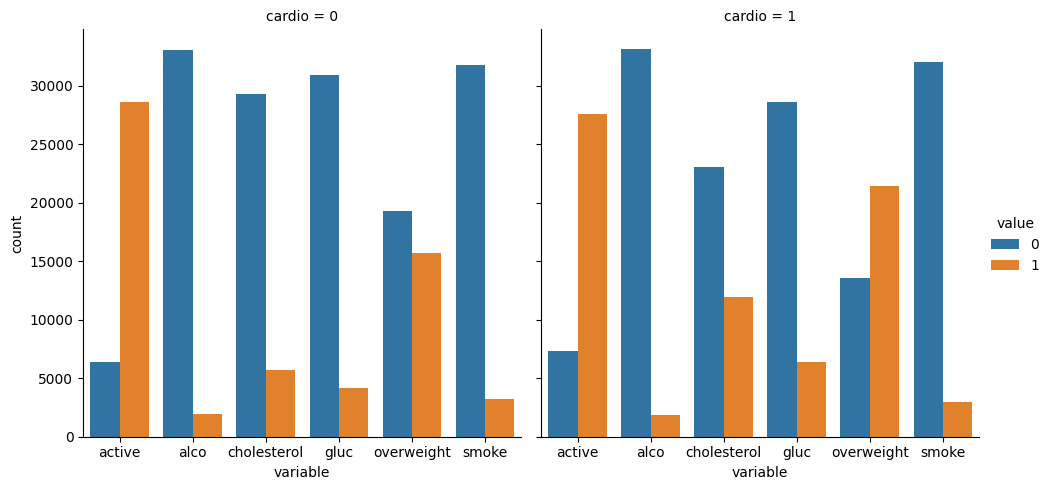

In [139]:
df2 = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df2
sns.catplot(data=df2, kind='count', x='variable', hue='value', col='cardio')

In [140]:
# Clean the data
df = df[df['ap_lo'] <= df['ap_hi']]
df = df[df['height'] >= df['height'].quantile(0.025)]
df = df[df['height'] <= df['height'].quantile(0.975)]
df = df[df['weight'] >= df['weight'].quantile(0.025)]
df = df[df['weight'] <= df['weight'].quantile(0.975)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


<AxesSubplot: >

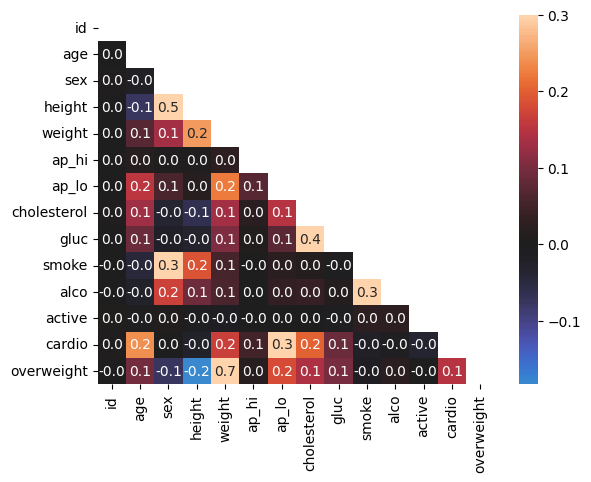

In [162]:
# Create a correlation matrix & plot a heatmap
corr_matrix = df.corr()
mask_arr = np.triu(corr_matrix)
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', robust=True)
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', vmin=-0.1, vmax=0.3)
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', robust=True, vmin=-0.1)
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', robust=True, center=0)
sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', center=0, vmax=0.3)